In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.set_printoptions(linewidth=120)

In [3]:
def create_causal_mask(seq_length):
    mask = torch.tril(torch.ones(seq_length, seq_length))
    
    mask_bool = mask.bool()
    
    return mask_bool

In [4]:
create_causal_mask(8)

tensor([[ True, False, False, False, False, False, False, False],
        [ True,  True, False, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False],
        [ True,  True,  True,  True, False, False, False, False],
        [ True,  True,  True,  True,  True, False, False, False],
        [ True,  True,  True,  True,  True,  True, False, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True,  True]])

In [5]:
def create_prefix_lm_mask(seq_length, prefix_length):
    """
    Creates a PrefixLM attention mask.
    
    Args:
        seq_length: Total length of the sequence (prefix + target)
        prefix_length: Length of the prefix portion
        
    Returns:
        A boolean mask where True allows attention and False blocks it
    """
    # Start with a zeros tensor (default: no attention allowed)
    mask = torch.zeros(seq_length, seq_length, dtype=torch.bool)
    
    # Block 1: Prefix can attend to all prefix tokens (full attention)
    mask[:prefix_length, :prefix_length] = True
    
    # Block 2: Target can attend to all prefix tokens
    mask[prefix_length:, :prefix_length] = True
    
    # Block 3: Target follows causal attention pattern
    causal_part = torch.tril(torch.ones(seq_length - prefix_length, 
                                        seq_length - prefix_length, 
                                        dtype=torch.bool))
    mask[prefix_length:, prefix_length:] = causal_part
    
    return mask

In [10]:
create_prefix_lm_mask(12,5).long()

tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [11]:
create_causal_mask(12).long()

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [12]:
import matplotlib.pyplot as plt

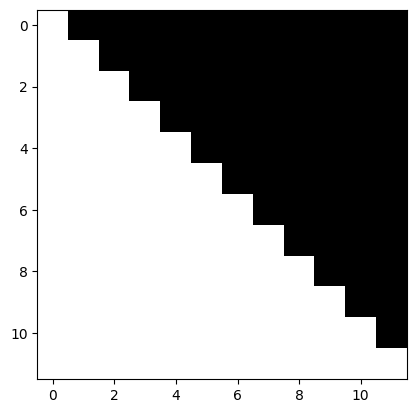

In [15]:
plt.imshow(create_causal_mask(12), cmap='gray')

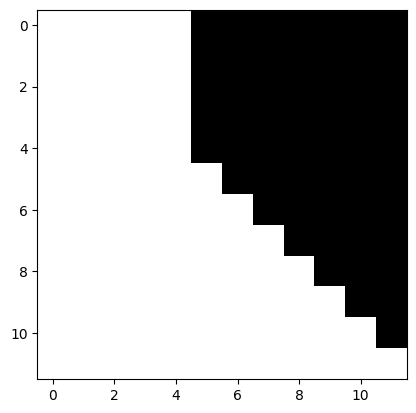

In [16]:
plt.imshow(create_prefix_lm_mask(12,5), cmap='gray')

In [20]:
cm = create_causal_mask(12).long()

In [25]:
cm[:6,:6]

tensor([[1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1]])

In [22]:
pm = create_prefix_lm_mask(12,5).long()

In [26]:
pm[:6,:6]

tensor([[1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1]])

In [27]:
cm = create_causal_mask(100).long()
cm[:6,:6]

tensor([[1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1]])

In [28]:
class Processor:
    def __init__(self, tokenizer_path, num_image_tokens=256):
        self.tokenizer_path = tokenizer_path
        self.image_size = 512
        self.num_image_tokens = 256
        self.tokenizer = AutoTokenizer.from_pretrained(self.tokenizer_path)
        self.new_chat_template = "{% for message in messages %}{% if loop.first and messages[0]['role'] != 'system' %}{{ '<|im_start|>system\nYou are a helpful multimodal AI assistant named simpleVLM, built by shreydan.<|im_end|>\n\nAnswer based on the image context:\n<|start_of_image|><|image_token|><|end_of_image|>\n' }}{% endif %}{{'<|im_start|>' + message['role'] + '\n' + message['content'] + '<|im_end|>' + '\n'}}{% endfor %}{% if add_generation_prompt %}{{ '<|im_start|>assistant\n' }}{% endif %}"
        self.tokenizer.chat_template = self.new_chat_template
        
        self.img_mean = [0.5,0.5,0.5]
        self.img_std = [0.5,0.5,0.5]
        self.img_transforms = T.Compose([
            T.Resize((self.image_size, self.image_size)),
            T.ToTensor(),
            T.Normalize(mean=self.img_mean, std=self.img_std)
        ])

    def preprocess_image(self, sample):
        image = sample['image']
        return self.img_transforms(image.convert('RGB'))
    
    def apply_chat_template(self, sample, use_system_prompt=True):
        text = sample['text']
        chat_text = self.tokenizer.apply_chat_template(
            text, 
            tokenize=False
        )
        chat_text = chat_text.replace('<|image_token|>','<|image_token|>'*self.num_image_tokens)
        return chat_text

    def __call__(self, sample):
        text = self.apply_chat_template(sample)
        image = self.preprocess_image(sample)
        input_ids = self.tokenizer.encode(text,return_tensors='pt',truncation=True,max_length=1024)
        return {
            'input_ids': input_ids,
            'pixel_values': image.unsqueeze(0)
        }

In [34]:
from transformers import AutoTokenizer
import torchvision.transforms as T
processor = Processor('../simpleVLM/')

In [36]:
sample=[{'role':'user','content':''}]

In [38]:
processor.apply_chat_template({'text':sample})

'<|im_start|>system\nYou are a helpful multimodal AI assistant named simpleVLM, built by shreydan.<|im_end|>\n\nAnswer based on the image context:\n<|start_of_image|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_t

In [41]:
tokenized = processor.tokenizer(processor.apply_chat_template({'text':sample}))['input_ids']

In [44]:
print(tokenized, tokenized.index(49153))

[1, 9690, 198, 2683, 359, 253, 5356, 37063, 32058, 5646, 11173, 3365, 2232, 70, 34519, 28, 2837, 411, 443, 257, 4198, 276, 30, 2, 198, 198, 21350, 1552, 335, 260, 2443, 2468, 42, 198, 49152, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 4915

In [48]:
prefix_length = 292

In [50]:
processor.tokenizer.decode(tokenized[:prefix_length])

'<|im_start|>system\nYou are a helpful multimodal AI assistant named simpleVLM, built by shreydan.<|im_end|>\n\nAnswer based on the image context:\n<|start_of_image|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_token|><|image_t

In [1]:
def prepare_prefix_lm_mask(max_seq_len, prefix_len):
    causal_mask = torch.triu(torch.ones(max_seq_len, max_seq_len),diagonal=1)
    return causal_mask

In [2]:
prepare_prefix_lm_mask(12,5).long()

NameError: name 'torch' is not defined